# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

INFO:2025-07-10 12:10:49,699:jax._src.xla_bridge:752: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


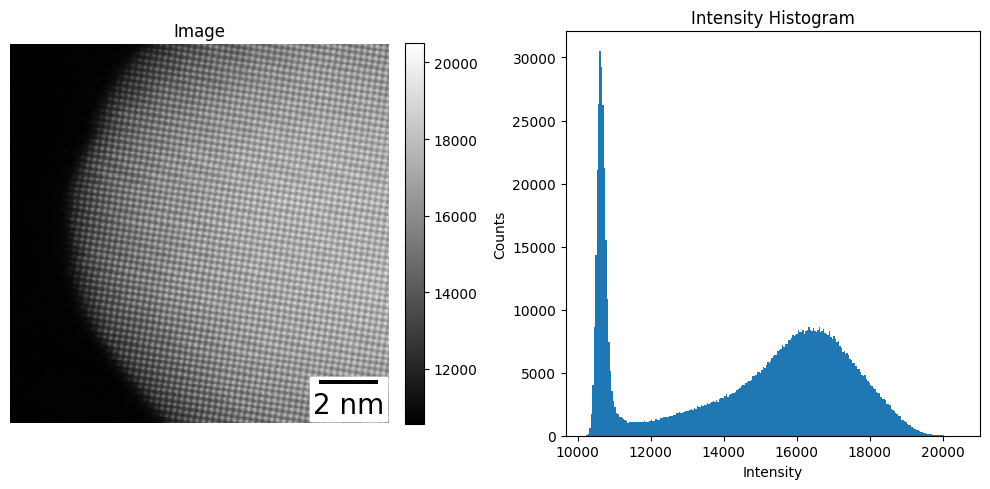

In [1]:
import matplotlib.pyplot as plt

import qem

legacyStatSTEM = qem.io.read_legacyInputStatSTEM('../data/Au/Example_Au.mat')
image = legacyStatSTEM['input']['obs']
dx = legacyStatSTEM['input']['dx']
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']

input_coordinates = inputStatSTEM['coordinates']
output_coordinates = outputStatSTEM['coordinates']
input_coordinates[:,1] = input_coordinates[:,1]/dx
input_coordinates[:,0] = input_coordinates[:,0]/dx
from qem.image_fitting import ImageFitting

model=ImageFitting(image, dx=dx, elements=['Au'])
model.import_coordinates(input_coordinates -1)
model.plot()

In [2]:


model.fit_background = True
model.same_width =True
model.model_type = 'gaussian'
params = model.init_params()
params = model.linear_estimator(params)
# model.fit_global(params, maxiter=1000, tol = 1e-6, verbose=True)
model.fit_stochastic(params, maxiter=50, tol =1e-3,batch_size=6000, num_epoch=10, verbose=1, step_size=0.1, plot=False)
# model.fit_voronoi(params=params)


Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - loss: 1054.1835
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - loss: 981.6848
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 955.1258
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 937.2627
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 922.8900
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 907.3686
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 896.8886
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 885.5559
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 877.1677
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 869.0524
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 862.9567
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 856.2268
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 850.4540
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 845.3553
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 840.1857
E

Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - loss: 776.4996
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - loss: 771.5492
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 756.7040
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 753.6390
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 753.9340
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 753.3555
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 753.8950
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 753.0815
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 753.1270
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 753.8121
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 752.3792
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 753.2500
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 752.6883
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 752.5448
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 752.6816
Ep

Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - loss: 733.3766
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 751.2071
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 725.2586
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 722.6177
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 723.0945
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 723.0159
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 721.8898
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 722.4283
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 721.7098
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 721.8002
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 722.3840
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 722.4204
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 721.5594
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 721.8132
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 720.9003
Ep

Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - loss: 713.1909
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - loss: 741.7548
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 708.4133
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 705.2175
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 706.1260
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 705.8880
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 706.2673
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 706.2836
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 704.8166
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 705.5450
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 705.3381
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 705.1836
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 705.1390
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 704.9575
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 704.9448
Ep

Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - loss: 698.7360
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - loss: 736.4845
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 695.3124
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 692.6053
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 693.8919
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 693.7005
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 693.4015
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 693.3539
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 693.2961
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 692.2507
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 693.0493
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 692.6750
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 693.7722
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 692.6989
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 693.5695
Ep

Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - loss: 689.5251
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - loss: 733.9333
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 687.5349
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 685.7145
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 686.6772
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 685.8949
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 686.2668
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 686.0061
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 685.8139
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 685.9573
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 686.1176
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 685.3961
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 685.5658
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 686.2438
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 685.7228
Ep

Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - loss: 683.6498
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - loss: 733.5508
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 682.6216
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 680.9193
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 681.5602
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 681.2965
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 681.6091
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 681.2570
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 680.6779
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 681.4297
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 680.9626
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 681.1259
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 680.6744
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 681.2880
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 681.2839
Ep

Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - loss: 679.7894
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - loss: 733.7246
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 679.1307
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 678.7615
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 678.0836
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 678.1417
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 678.3724
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 677.8585
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 677.3648
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 678.0995
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 677.7935
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 677.6515
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 677.7090
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 677.6242
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 678.2227
Ep

Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - loss: 677.1335
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - loss: 733.6145
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 676.9200
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 676.3014
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 675.7444
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 676.1528
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 676.2447
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 675.4869
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 675.9216
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 675.4419
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 675.9944
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 676.0983
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 675.8849
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 675.2484
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 676.0504
Ep

Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - loss: 675.2958
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 735.2326
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 674.9727
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 674.9044
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 675.0465
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 674.5634
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 674.6411
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 674.6460
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 674.2578
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 674.0134
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 673.8723
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 674.2323
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 674.3713
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 674.3173
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 673.6882
Ep

Fitting random batch: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]
INFO:root:Convergence rate for pos_x = 0.152984619140625
INFO:root:Convergence rate for pos_y = 0.43939208984375
INFO:root:Convergence rate for height = 0.00031246276921592653
INFO:root:Convergence rate for width = 0.002034725621342659
INFO:root:Convergence not reached


{'pos_x': Array([ 155.77913,  158.24934,  157.6147 , ..., 1023.     , 1022.18915,
         217.4953 ], dtype=float32),
 'pos_y': Array([ 436.9723 ,  406.67465,  526.6224 , ..., 1005.76587, 1017.33215,
         258.51886], dtype=float32),
 'height': Array([1036.4014 , 1218.6168 ,  955.14276, ..., 5081.153  , 4946.936  ,
        1095.5377 ], dtype=float32),
 'width': Array([5.9456844], dtype=float32),
 'background': np.float32(10599.591)}

In [5]:
model.fit_voronoi()


Fitting cells:  21%|██▏       | 632/2949 [00:00<00:01, 1159.24it/s]/home/zzhang/OneDrive/code/qem/qem/image_fitting.py:1193: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
Fitting cells: 100%|██████████| 2949/2949 [00:01<00:00, 1616.22it/s]
INFO:root:Convergence rate for pos_x = 11.01849365234375
INFO:root:Convergence not reached
Fitting cells: 100%|██████████| 2949/2949 [00:01<00:00, 2417.85it/s]
INFO:root:Convergence rate for pos_x = 26.092864990234375
INFO:root:Convergence not reached
Fitting cells: 100%|██████████| 2949/2949 [00:01<00:00, 2453.79it/s]
INFO:root:Convergence rate for pos_x = 41.102752685546875
INFO:root:Convergence not reached
Fitting cells: 100%|██████████| 2949/2949 [00:01<00:00, 2397.34it/s]
INFO:root:Convergence rate for pos_x = 0.0003662109375
INFO:root:Convergence rate for pos_y = 0.0001220703125
INFO:root:Convergence rate for height = 0.0
INFO:root:Convergence rate for width = 0.0
INFO:root:Convergence rate for back

{'pos_x': array([ 157.56606,  161.83456,  158.67201, ..., 1023.     , 1011.1703 ,
         220.00859], shape=(2949,), dtype=float32),
 'pos_y': array([ 436.37677,  406.89365,  527.8849 , ..., 1005.76587, 1020.5265 ,
         260.05997], shape=(2949,), dtype=float32),
 'height': array([1036.4014 , 1218.6168 ,  955.14276, ..., 5081.153  , 4946.936  ,
        1095.5377 ], shape=(2949,), dtype=float32),
 'width': array([5.9456844], dtype=float32),
 'background': array(10599.591, dtype=float32)}

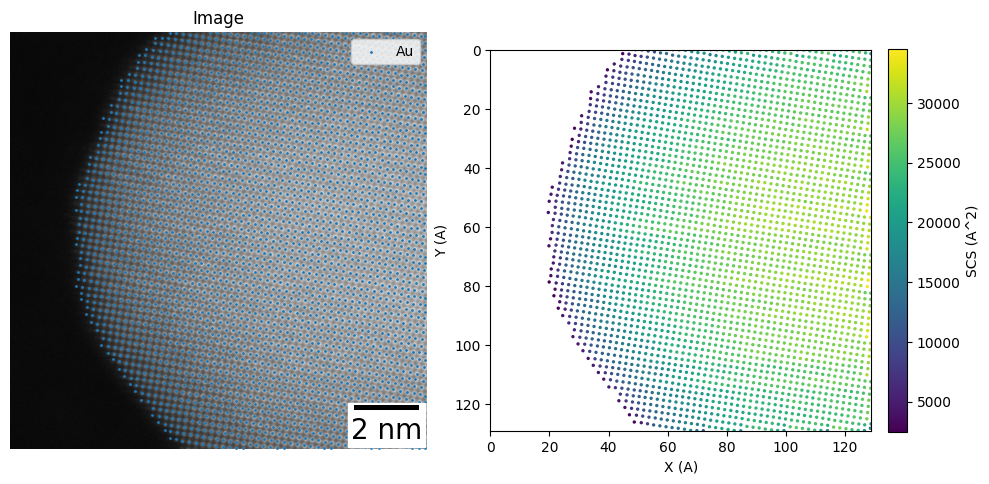

In [7]:
model.plot_scs()

Text(0.5, 1.0, 'Residuals')

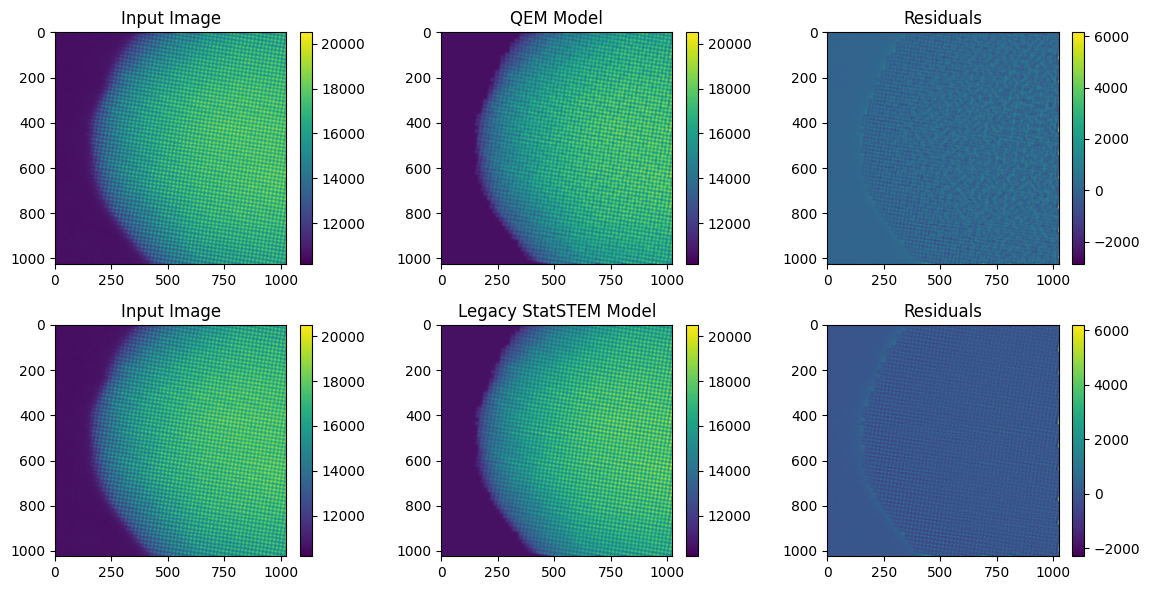

In [8]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,2)
im=plt.imshow(model.prediction)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.tight_layout()
plt.title('QEM Model')

plt.subplot(2,3,3)
diff = model.image - model.prediction
im=plt.imshow(diff)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

plt.subplot(2,3,4)
im=plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())   
plt.tight_layout()
plt.title('Legacy StatSTEM Model')

plt.subplot(2,3,6)
im=plt.imshow(inputStatSTEM['obs']-outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

In [4]:
import numpy as np
our = np.std(model.residual(model.params))

ref = np.std(inputStatSTEM['obs']-outputStatSTEM['model'])

our, ref

(Array(466.87674, dtype=float32), np.float64(432.58838752864705))